# 데이터 생성

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 데이터 생성
np.random.seed(42)
x1 = np.random.normal(size=100)
x2 = 2 * x1 + np.random.normal(size=100)  # 다중공선성을 가진 변수
y = 5 + 3 * x1 + np.random.normal(size=100)

# 데이터 프레임 생성
df_multicol = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})


# EDA로 다중공선성 탐색

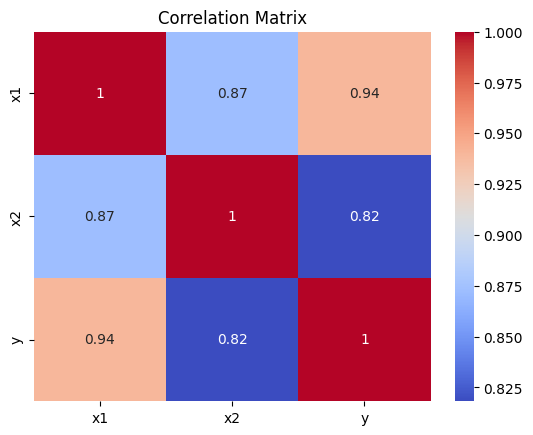

In [8]:
# EDA
sns.heatmap(df_multicol.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 디자인 행렬 생성
X_multicol = df_multicol[['x1', 'x2']]
X_multicol = sm.add_constant(X_multicol)

# VIF 계산
vif = pd.DataFrame()
vif['Variable'] = X_multicol.columns
vif['VIF'] = [variance_inflation_factor(X_multicol.values, i) for i in range(X_multicol.shape[1])]

print(vif)

  Variable       VIF
0    const  1.013270
1       x1  4.185663
2       x2  4.185663


# 변수 제거후 적합

In [10]:
# x2 제거 후 모델 적합
X_reduced = X_multicol[['const', 'x1']]
model_reduced = sm.OLS(df_multicol['y'], X_reduced).fit()
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     743.4
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           1.50e-47
Time:                        14:53:42   Log-Likelihood:                -147.63
No. Observations:                 100   AIC:                             299.3
Df Residuals:                      98   BIC:                             304.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0886      0.108     47.256      0.0

# 주성분회귀

In [11]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [12]:
# 주성분 회귀 수행
pca = PCA()
lr = LinearRegression()
pipeline = make_pipeline(StandardScaler(), pca, lr)
pipeline.fit(df_multicol[['x1', 'x2']], df_multicol['y'])

# 주성분 회귀 성능 평가
scores = cross_val_score(pipeline, df_multicol[['x1', 'x2']], df_multicol['y'], cv=5, scoring='r2')
print("PCR R^2 scores:", scores)
print("Mean PCR R^2 score:", np.mean(scores))

PCR R^2 scores: [0.88906447 0.87995687 0.80043203 0.87948359 0.8491358 ]
Mean PCR R^2 score: 0.8596145539678572


# 벌점화회귀

In [15]:
from sklearn.linear_model import Ridge, Lasso

In [16]:
# 데이터 준비
X = df_multicol[['x1', 'x2']]
y = df_multicol['y']

In [17]:
# Ridge 회귀
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
print("Ridge coefficients:", ridge.coef_)

Ridge coefficients: [3.09317565 0.05212899]


In [18]:
# Lasso 회귀
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
print("Lasso coefficients:", lasso.coef_)

Lasso coefficients: [2.94902684 0.08431999]
